In [1]:
import pandas as pd
import numpy as np

In [17]:
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
market_data = pd.read_csv("./data/Bitcoin Price Weekly 2022 to 2010 .csv")
graph_parameters= pd.read_csv("./data/weeklyparameters.csv")

In [5]:
full_df= pd.concat([market_data.iloc[50:50+graph_parameters.shape[0],1:].reset_index().drop('index',axis=1),graph_parameters],axis=1).iloc[:116]

In [6]:
threshold=3
def y_creator(threshold):
    Y = []
    for i in market_data["Change %"][51:51+graph_parameters.shape[0]]:
        if abs(i)>threshold:
            if i>0:
                Y.append(1)
            else:
                Y.append(-1)
        else:
            Y.append(0)
    return Y
Y = y_creator(threshold)

In [7]:
def model_creation(x, Y):
    scaler = StandardScaler()
    scaled_x = scaler.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(scaled_x, Y, test_size=0.33, random_state=42)
    
    svm_model           = svm.SVC(C=1.1419770655821517, gamma=0.09643311030464571)
    stockhastic_model   = SGDClassifier(alpha=0.01, loss='log', n_jobs=-1)
    knn_model           = KNeighborsClassifier(n_neighbors=5)
    decisiontree_model  = DecisionTreeClassifier()
    random_forest_model = RandomForestClassifier(max_depth=2, random_state=0)
    
    svm_model.fit(x_train, y_train)
    stockhastic_model.fit(x_train, y_train)
    knn_model.fit(x_train, y_train)
    decisiontree_model.fit(x_train, y_train)
    random_forest_model.fit(x_train, y_train)
    
    prediction_svm_model          = svm_model.predict(x_test)
    prediction_stockhastic_model  = stockhastic_model.predict(x_test)
    prediction_knn_model          = knn_model.predict(x_test)
    prediction_decisiontree_model = decisiontree_model.predict(x_test)
    prediction_random_forest_model= random_forest_model.predict(x_test)
    
    f1_score_svm_model           = f1_score(y_test, prediction_svm_model,          average='macro')
    f1_score_stockhastic_model   = f1_score(y_test, prediction_stockhastic_model,  average='macro')
    f1_score_knn_model           = f1_score(y_test, prediction_knn_model,          average='macro')
    f1_score_decisiontree_model  = f1_score(y_test, prediction_decisiontree_model, average='macro')
    f1_score_random_forest_model = f1_score(y_test, prediction_random_forest_model,average="macro")
    
    precision_score_svm_model           = precision_score(y_test, prediction_svm_model          , average='macro')
    precision_score_stockhastic_model   = precision_score(y_test, prediction_stockhastic_model  , average='macro')
    precision_score_knn_model           = precision_score(y_test, prediction_knn_model          , average='macro')
    precision_score_decisiontree_model  = precision_score(y_test, prediction_decisiontree_model , average='macro')
    precision_score_random_forest_model= precision_score(y_test, prediction_random_forest_model, average="macro")
    
    accuracy_score_svm_model           = accuracy_score(y_test, prediction_svm_model          )
    accuracy_score_stockhastic_model   = accuracy_score(y_test, prediction_stockhastic_model  )
    accuracy_score_knn_model           = accuracy_score(y_test, prediction_knn_model          )
    accuracy_score_decisiontree_model  = accuracy_score(y_test, prediction_decisiontree_model )
    accuracy_score_random_forest_model = accuracy_score(y_test, prediction_random_forest_model)
    
    scores= [[f1_score_svm_model, precision_score_svm_model, accuracy_score_svm_model]\
            ,[f1_score_stockhastic_model, precision_score_stockhastic_model, accuracy_score_stockhastic_model]\
            ,[f1_score_knn_model, precision_score_knn_model, accuracy_score_knn_model]\
            ,[f1_score_decisiontree_model, precision_score_decisiontree_model, accuracy_score_decisiontree_model]\
            ,[f1_score_random_forest_model,precision_score_random_forest_model, accuracy_score_random_forest_model]]
    temp_df = pd.DataFrame(scores)
    temp_df.columns = ["F1", "Precision", "Accuracy"]
    temp_df = temp_df.T
    temp_df.columns=["SVM", "Stockhastic", "KNN", "DecisionTree", "Random Forest"]
    return temp_df.T
    

In [8]:
results_with_graph = model_creation(full_df,Y)

In [9]:
results_without_graph = model_creation(market_data.iloc[50:50+graph_parameters.shape[0],1:],Y)

In [10]:
results_with_graph

,F1,Precision,Accuracy
SVM,0.197531,0.140351,0.421053
Stockhastic,0.284259,0.385417,0.394737
KNN,0.395183,0.412785,0.421053
DecisionTree,0.385714,0.401629,0.421053
Random Forest,0.188679,0.135135,0.394737


In [11]:
results_without_graph

,F1,Precision,Accuracy
SVM,0.197531,0.140351,0.421053
Stockhastic,0.197531,0.140351,0.421053
KNN,0.417508,0.433333,0.447368
DecisionTree,0.481193,0.502646,0.500000
Random Forest,0.240718,0.196409,0.342105


In [12]:
results_with_graph-results_without_graph

,F1,Precision,Accuracy
SVM,0.000000,0.000000,0.000000
Stockhastic,0.086728,0.245066,-0.026316
KNN,-0.022326,-0.020549,-0.026316
DecisionTree,-0.095479,-0.101016,-0.078947
Random Forest,-0.052039,-0.061273,0.052632


In [13]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(full_df)
x_train, x_test, y_train, y_test = train_test_split(scaled_x, Y, test_size=0.33, random_state=42)

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

svm_model           = svm.SVC()
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_model, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(x_train, y_train)
print(rnd_search_cv.best_score_)
print(rnd_search_cv.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ......C=6.354224961751176, gamma=0.0643645784323179; total time=   0.0s
[CV] END ......C=6.354224961751176, gamma=0.0643645784323179; total time=   0.0s
[CV] END ......C=6.354224961751176, gamma=0.0643645784323179; total time=   0.0s
[CV] END ......C=5.52365420493836, gamma=0.09478031450944008; total time=   0.0s
[CV] END ......C=5.52365420493836, gamma=0.09478031450944008; total time=   0.0s
[CV] END ......C=5.52365420493836, gamma=0.09478031450944008; total time=   0.0s
[CV] END .....C=6.657588375066739, gamma=0.04744545388008625; total time=   0.0s
[CV] END .....C=6.657588375066739, gamma=0.04744545388008625; total time=   0.0s
[CV] END .....C=6.657588375066739, gamma=0.04744545388008625; total time=   0.0s
[CV] END ...C=3.0824940381421575, gamma=0.005238156600713467; total time=   0.0s
[CV] END ...C=3.0824940381421575, gamma=0.005238156600713467; total time=   0.0s
[CV] END ...C=3.0824940381421575, gamma=0.005238

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    3.8s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    3.8s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:    3.8s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    3.8s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    3.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.9s finished


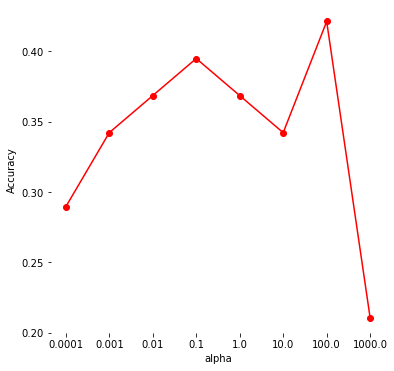

SGDClassifier(alpha=100.0, loss='log', n_jobs=-1) 0.42105263157894735


In [15]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf

grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier, paramGrid,
           x_train, y_train, x_test, y_test, 
           metric = accuracy_score,
           scoreLabel = "Accuracy")

print(bestModel, bestScore)

In [18]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 16
